# Initial EDA

## Import Libraries and Files

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
aisle = pd.read_csv("/Users/yen/Desktop/instacart-reorder-prediction/data/aisles.csv")
department = pd.read_csv("/Users/yen/Desktop/instacart-reorder-prediction/data/departments.csv")
order = pd.read_csv("/Users/yen/Desktop/instacart-reorder-prediction/data/orders.csv")
product = pd.read_csv("/Users/yen/Desktop/instacart-reorder-prediction/data/products.csv")
prior_order = pd.read_csv("/Users/yen/Desktop/instacart-reorder-prediction/data/order_products__prior.csv")
train_order = pd.read_csv("/Users/yen/Desktop/instacart-reorder-prediction/data/order_products__train.csv")

## Datasets Overviews

In [38]:
file_list = [aisle, department, order, product, prior_order, train_order]
for i in file_list:
    print(i.shape)
    print(i.info())
    print(i.head(2))
    print()

(134, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
   aisle_id                  aisle
0         1  prepared soups salads
1         2      specialty cheeses

(21, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None
   department_id department
0              1     frozen
1              2      other

(3421083, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column           

##### NOTES: [aisle], [department] and [product] are for the product description; [prior_order] is for all the transactions

## Order Frequency of Each Customer

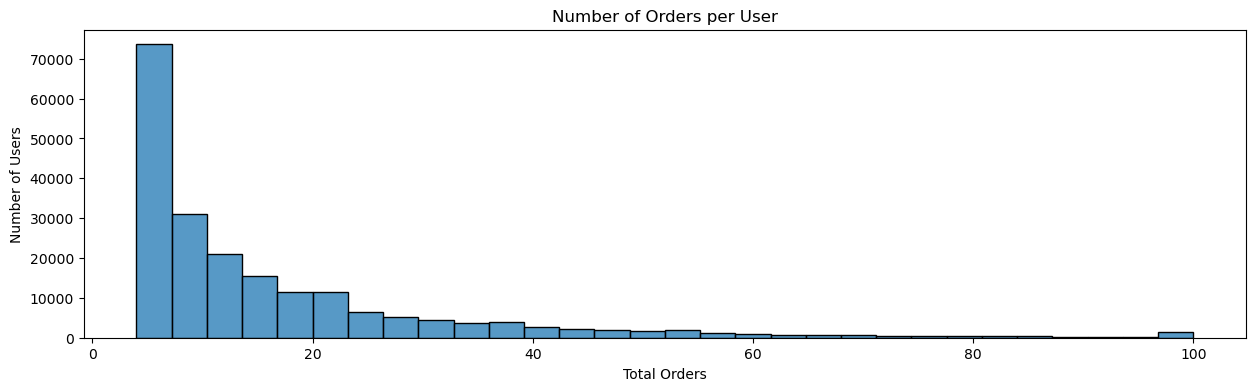

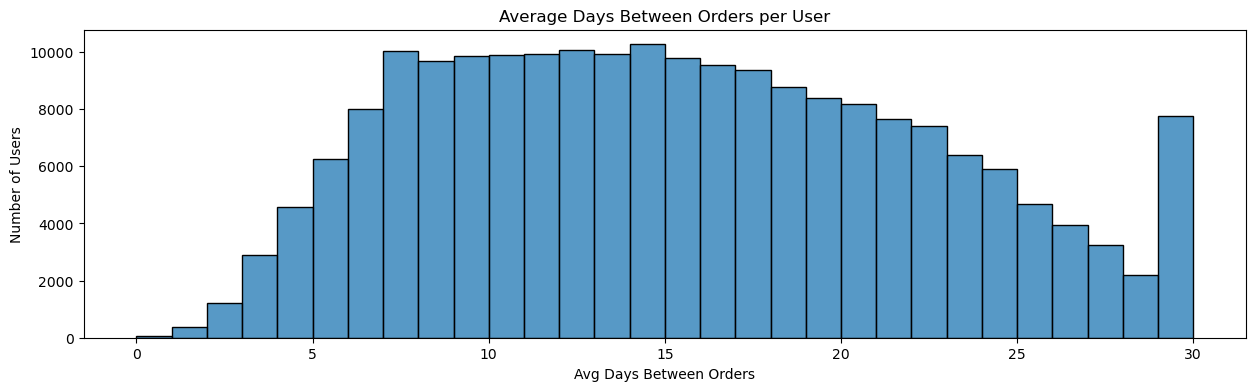

In [46]:
# the distribution of Number of Orders per User
user_orders = order.groupby('user_id')['order_number'].max()

plt.figure(figsize=(15,4))
sns.histplot(user_orders, bins=30, kde=False)
plt.title('Number of Orders per User')
plt.xlabel('Total Orders')
plt.ylabel('Number of Users')
plt.show()

# the distribution of Average Days Between Orders per User
order_intervals = order[order['days_since_prior_order'].notna()]
user_intervals = order_intervals.groupby('user_id')['days_since_prior_order'].mean()

plt.figure(figsize=(15,4))
sns.histplot(user_intervals, bins=30, kde=False)
plt.title('Average Days Between Orders per User')
plt.xlabel('Avg Days Between Orders')
plt.ylabel('Number of Users')
plt.show()

## Reorder Rate

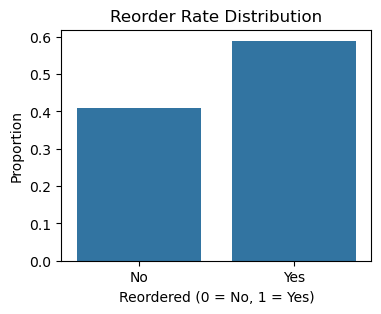

Reorder rate: 0.59


In [50]:
reorder_rate = prior_order['reordered'].value_counts(normalize=True)

plt.figure(figsize=(4,3))
sns.barplot(x=reorder_rate.index, y=reorder_rate.values)
plt.title('Reorder Rate Distribution')
plt.xlabel('Reordered (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

print("Reorder rate:", round(reorder_rate[1], 2))

## Best-Sellers and Most-Reordered Products 

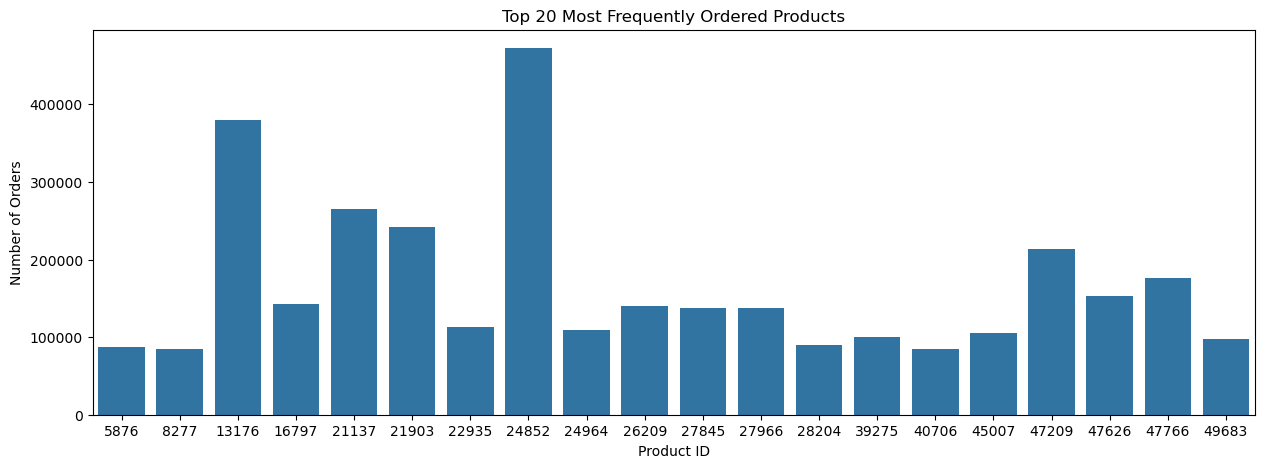

In [72]:
# top products in all the transactions
top_products = prior_order['product_id'].value_counts().head(20).reset_index()
top_products.columns = ['product_id', 'count']

plt.figure(figsize=(15,5))
sns.barplot(x='product_id', y='count', data=top_products)
plt.title('Top 20 Most Frequently Ordered Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Orders')
plt.show()

In [71]:
# merge with products.csv to get product names
top_products_named = top_products.merge(product[['product_id', 'product_name']], on='product_id', how='left')
print(top_products_named[['product_id', 'product_name', 'count']])

    product_id              product_name   count
0        24852                    Banana  472565
1        13176    Bag of Organic Bananas  379450
2        21137      Organic Strawberries  264683
3        21903      Organic Baby Spinach  241921
4        47209      Organic Hass Avocado  213584
5        47766           Organic Avocado  176815
6        47626               Large Lemon  152657
7        16797              Strawberries  142951
8        26209                     Limes  140627
9        27845        Organic Whole Milk  137905
10       27966       Organic Raspberries  137057
11       22935      Organic Yellow Onion  113426
12       24964            Organic Garlic  109778
13       45007          Organic Zucchini  104823
14       39275       Organic Blueberries  100060
15       49683            Cucumber Kirby   97315
16       28204        Organic Fuji Apple   89632
17        5876             Organic Lemon   87746
18        8277  Apple Honeycrisp Organic   85020
19       40706    Or

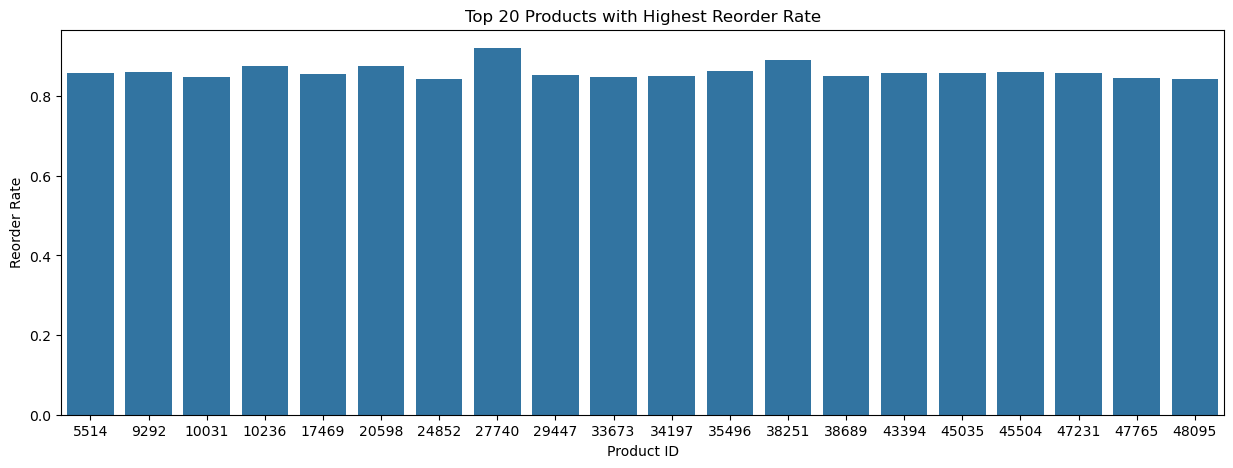

In [59]:
# Top 20 Products with Highest Reorder Rate
reorder_stats = prior_order.groupby('product_id')['reordered'].agg(['mean','count']).reset_index()
reorder_stats = reorder_stats[reorder_stats['count'] > 100].sort_values(by='mean', ascending=False).head(20)

plt.figure(figsize=(15,5))
sns.barplot(x='product_id', y='mean', data=reorder_stats)
plt.title('Top 20 Products with Highest Reorder Rate')
plt.xlabel('Product ID')
plt.ylabel('Reorder Rate')
plt.show()

In [74]:
reorder_stats_named = reorder_stats.merge(product[['product_id', 'product_name']], on='product_id', how='left')
print(reorder_stats_named[['product_id', 'product_name', 'mean', 'count']])

    product_id                                       product_name      mean  \
0        27740                                 Chocolate Love Bar  0.920792   
1        38251                              Benchbreak Chardonnay  0.891892   
2        10236  Fragrance Free Clay with Natural Odor Eliminat...  0.875969   
3        20598                         Thousand Island Salad Snax  0.875000   
4        35496                       Real2 Alkalized Water 500 ml  0.862528   
5         9292                    Half And Half Ultra Pasteurized  0.861691   
6        45504                         Whole Organic Omega 3 Milk  0.860233   
7        43394                    Organic Lactose Free Whole Milk  0.859030   
8         5514                     Organic Homogenized Whole Milk  0.857683   
9        47231                               Ultra-Purified Water  0.857623   
10       45035                               Coffee Flavor Yogurt  0.857143   
11       17469                               Lo-Carb

## Behavioural Analysis by Category

In [60]:
products_merged = product.merge(aisle, on='aisle_id').merge(department, on='department_id')
order_products = prior_order.merge(products_merged, on='product_id')
order_data = order_products.merge(order[['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day']], on='order_id')

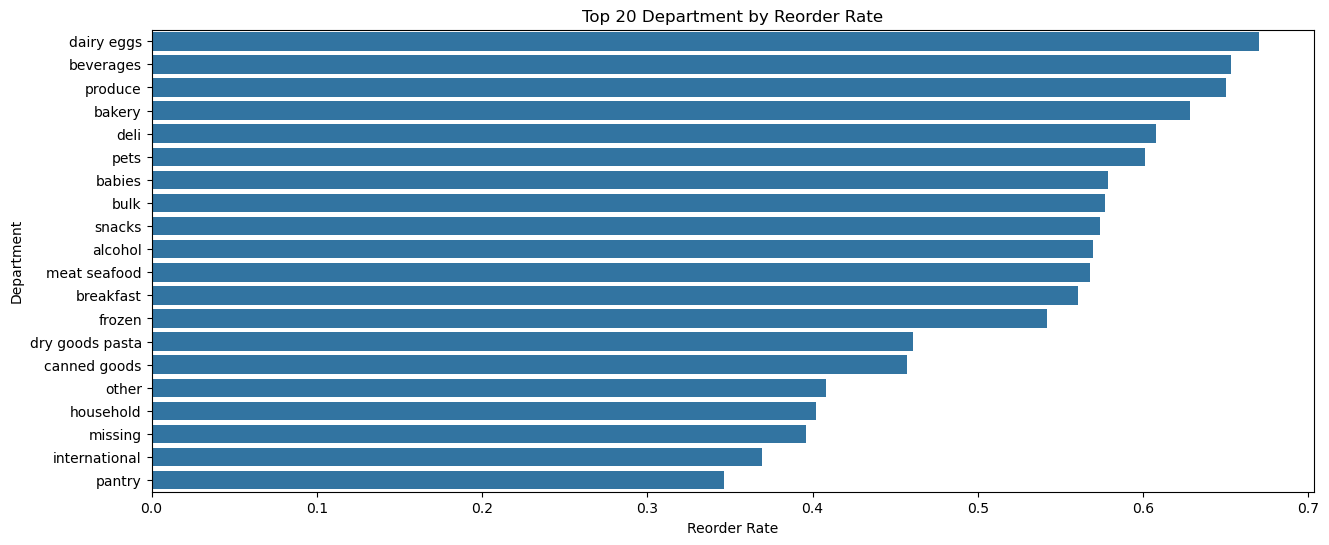

In [66]:
department_order = order_products.groupby('department')['reordered'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(15,6))
sns.barplot(x=department_order.values, y=department_order.index)
plt.title('Top 20 Department by Reorder Rate')
plt.xlabel('Reorder Rate')
plt.ylabel('Department')
plt.show()

## PeakTime Analysis

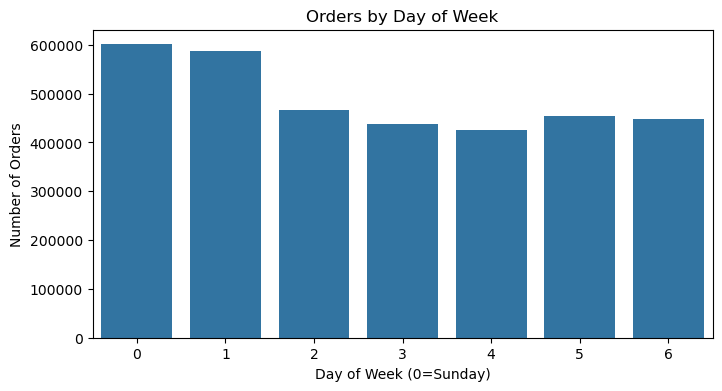

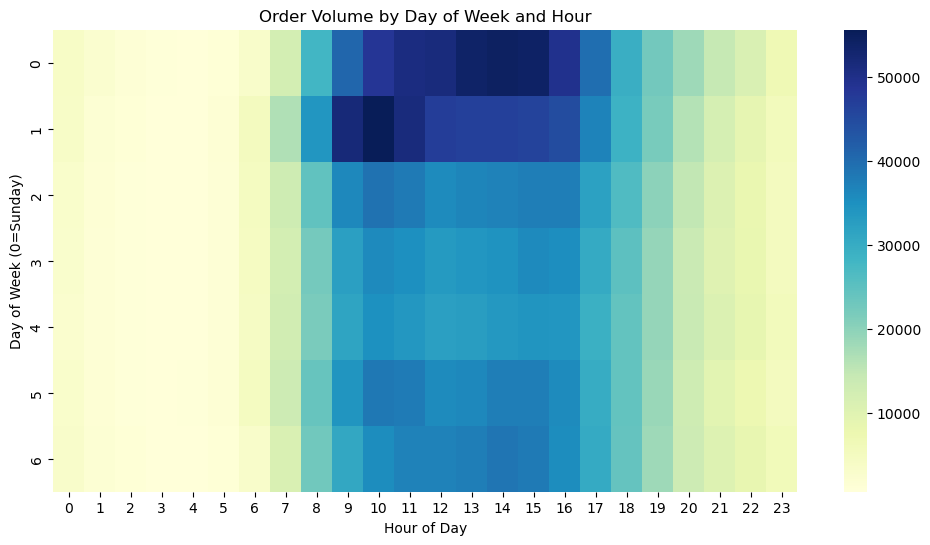

In [69]:
# Which Day of the Week
order_dow = order['order_dow'].value_counts().sort_index()

plt.figure(figsize=(8,4))
sns.barplot(x=order_dow.index, y=order_dow.values)
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week (0=Sunday)')
plt.ylabel('Number of Orders')
plt.show()

# Heatmap：different time in a week
dow_hour = order.groupby(['order_dow', 'order_hour_of_day']).size().unstack()

plt.figure(figsize=(12,6))
sns.heatmap(dow_hour, cmap='YlGnBu')
plt.title('Order Volume by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Sunday)')
plt.show()